# Analysis of Amazon's Best Selling Books in Ten years (2009 -2019)

##  1.0 WebScrapping Phase

As part of the Data Curation project for Hamoye Stage E, I will be analysing the best selling books by Amazon in a period of ten years starting from 2009 to 2019.

This section is dedicated solely to the sourcing of the needed data for the analysis. The Amazon website best selling books section was scrapped using both BeautifulSoup and Selenium.

In [1]:
#importing relevant librariers and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing web scrapping libraries

import requests
from bs4 import BeautifulSoup
from selenium import webdriver

In [3]:
#calling the website to be scrapped
#the content needed is in two pages but the first page and last page has the same url pattern for all the years required.
#years are from 2009 to 2019.


urls =[]
years = [str(i) for i in range(2009,2020)]
for year in years:
    urls.append (f"https://www.amazon.com/gp/bestsellers/{year}/books/ref=zg_bsar_cal_ye")
    urls.append(f"https://www.amazon.com/gp/bestsellers/{year}/books/ref=zg_bsar_pg_2/ref=zg_bsar_pg_2?ie=UTF8&pg=2")

In [4]:
#defining a function to get the details of each book for each year in the website

def get_dir(book,year): 
    
    try:
        rank = book.find('span', class_='zg-bdg-text').text[1:]
    except Exception as e:
        rank = np.nan
    
    try:
        title = book.find('div',class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y").text
    except Exception as e:
        title = np.nan
   
    try:
        author = book.find('a',class_="a-size-small a-link-child").text
    except Exception as e:
        author = np.nan
    
    year = year
    
    try:
        ratings= book.find('span',class_="a-icon-alt").text[:3] 
    except Exception as e:
        ratings = np.nan
    
    try:
        reviews  = book.find('span',class_="a-size-small").text
    except Exception as e:
        reviews = np.nan
    
    try:
        cover_type = book.find('span',class_="a-size-small a-color-secondary a-text-normal").text
    except Exception as e:
        cover_type = np.nan
    
    try:
        price = book.find('span',class_="_cDEzb_p13n-sc-price_3mJ9Z").text[1:]
    except Exception as e:
        price = np.nan
   
    return [rank,title, author, year, ratings, reviews, cover_type, price]

In [5]:
#creating list that contains a set of each year.

year = [(str(i),str(i)) for i in range(2009,2020)] 
years = [j for i in year for j in i]

In [6]:
#scrapping the whole website using selenium webdriver and beautifulsoup's html parser
#first, create an empty list for the content of the 2 webpages and then load selenium driver to scrape the dynamic site
#using the sleep module helps to allow the site to load fully before going to the next page


from time import sleep
every_year = []

for url in urls:
    
    website = url 
    
    driver = webdriver.Edge()
    
    driver.get(website)       
    
    sleep(45)                
    
    the_soup = BeautifulSoup(driver.page_source, 'html.parser')        
    
    books = the_soup.find_all(id = 'gridItemRoot')                 
    
    every_year.append(books)
    
    
    driver.quit()   

In [7]:
#checking if the webscrapping covered all the years intended using len

len(every_year), len(years)

(22, 22)

In [8]:
#listing the years

year_index = (list(enumerate(years)))
yrlist = year_index

yrlist

[(0, '2009'),
 (1, '2009'),
 (2, '2010'),
 (3, '2010'),
 (4, '2011'),
 (5, '2011'),
 (6, '2012'),
 (7, '2012'),
 (8, '2013'),
 (9, '2013'),
 (10, '2014'),
 (11, '2014'),
 (12, '2015'),
 (13, '2015'),
 (14, '2016'),
 (15, '2016'),
 (16, '2017'),
 (17, '2017'),
 (18, '2018'),
 (19, '2018'),
 (20, '2019'),
 (21, '2019')]

In [9]:
#creating an empty list to accomodate the observations for all the books from each year.
#It's all about loops, loop through the year_index for the years, loop through books for all years,
# then loop through the books for each page and append to the empty list created.

bestseller = []
for i in yrlist:   
    for books in every_year[i[0]]:             
        for book in books:                   
            bestseller.append(get_dir(book,i[1])) 
            
            

In [10]:
#creating the bestseller data into a dataframe

best_selling = pd.DataFrame(bestseller, columns = ['Rank', 'Title', 'Author', 'Year', 'Ratings', 'Reviews', 'Cover_type','Price($)'])

In [11]:
#loading the dataframe

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)


best_selling

,Rank,Title,Author,Year,Ratings,Reviews,Cover_type,Price($)
0,1,The Lost Symbol (Robert Langdon),Dan Brown,2009,4.3,"29,019",Hardcover,15.05
1,2,The Shack: Where Tragedy Confronts Eternity,William P. Young,2009,4.6,"41,129",Paperback,10.14
2,3,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,2009,4.8,"5,341",Hardcover,14.76
3,4,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,2009,4.7,"25,424",Hardcover,19.55
4,5,Going Rogue: An American Life,Sarah Palin,2009,4.6,"1,598",Hardcover,6.30
5,6,StrengthsFinder 2.0,NaN,2009,4.1,Gallup,Hardcover,20.96
6,7,The Help,Kathryn Stockett,2009,4.7,"33,007",Hardcover,15.00
7,8,New Moon (The Twilight Saga),Stephenie Meyer,2009,4.6,"21,013",Paperback,17.01
8,9,The Twilight Saga Collection,Stephenie Meyer,2009,4.7,"7,059",Hardcover,58.00
9,10,Outliers: The Story of Success,Malcolm Gladwell,2009,4.6,"35,961",Hardcover,15.69


In [12]:
#converting to a csv file and saved for future purposes.

best_selling.to_csv('Best_seller_books (2009-2019).csv') 

## 2.0 Analysis Phase

In this section, I will be analysing the Amazon best selling books dataset already obtained in the webscrappping phase. 

This will be done with the hope of getting meaningful insights about the sales in this 10 year period by Amazon. Proper Visualizations will accompany the insights gotten from the data.

In [2]:
#loading the dataset

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)

Amazon_data = pd.read_csv('best_seller_books (2009-2019).csv')

Amazon_data

,Unnamed: 0,Rank,Title,Author,Year,Ratings,Reviews,Cover_type,Price($)
0,0,1.0,The Lost Symbol (Robert Langdon),Dan Brown,2009,4.3,"29,019",Hardcover,15.05
1,1,2.0,The Shack: Where Tragedy Confronts Eternity,William P. Young,2009,4.6,"41,129",Paperback,10.14
2,2,3.0,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,2009,4.8,"5,341",Hardcover,14.76
3,3,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,2009,4.7,"25,424",Hardcover,19.55
4,4,5.0,Going Rogue: An American Life,Sarah Palin,2009,4.6,"1,598",Hardcover,6.30
5,5,6.0,StrengthsFinder 2.0,NaN,2009,4.1,Gallup,Hardcover,20.96
6,6,7.0,The Help,Kathryn Stockett,2009,4.7,"33,007",Hardcover,15.00
7,7,8.0,New Moon (The Twilight Saga),Stephenie Meyer,2009,4.6,"21,013",Paperback,17.01
8,8,9.0,The Twilight Saga Collection,Stephenie Meyer,2009,4.7,"7,059",Hardcover,58.00
9,9,10.0,Outliers: The Story of Success,Malcolm Gladwell,2009,4.6,"35,961",Hardcover,15.69


### 2.1 EXPLORATORY DATA ANALYSIS

#### 2.1.1 DATA INSPECTION

In the subsection, the dataset will be inspected on a generic terms

In [3]:
Amazon_data.describe(include = 'all')

,Unnamed: 0,Rank,Title,Author,Year,Ratings,Reviews,Cover_type,Price($)
count,1096.000000,1092.000000,1089,943,1096.000000,1092.000000,1092,1090,1036.000000
unique,NaN,NaN,637,384,NaN,NaN,619,8,NaN
top,NaN,NaN,StrengthsFinder 2.0,Rick Riordan,NaN,NaN,Gallup,Hardcover,NaN
freq,NaN,NaN,11,18,NaN,NaN,13,552,NaN
mean,547.500000,50.289377,NaN,NaN,2014.017336,4.605403,NaN,NaN,13.649942
std,316.532252,28.802761,NaN,NaN,3.156304,0.201821,NaN,NaN,7.463567
min,0.000000,1.000000,NaN,NaN,2009.000000,3.500000,NaN,NaN,1.500000
25%,273.750000,25.000000,NaN,NaN,2011.000000,4.500000,NaN,NaN,9.390000
50%,547.500000,50.000000,NaN,NaN,2014.000000,4.600000,NaN,NaN,12.490000
75%,821.250000,75.000000,NaN,NaN,2017.000000,4.700000,NaN,NaN,15.935000


In [4]:
Amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1096 non-null   int64  
 1   Rank        1092 non-null   float64
 2   Title       1089 non-null   object 
 3   Author      943 non-null    object 
 4   Year        1096 non-null   int64  
 5   Ratings     1092 non-null   float64
 6   Reviews     1092 non-null   object 
 7   Cover_type  1090 non-null   object 
 8   Price($)    1036 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 77.2+ KB


In [5]:
#checking for null values

Amazon_data.isnull().sum()

Unnamed: 0      0
Rank            4
Title           7
Author        153
Year            0
Ratings         4
Reviews         4
Cover_type      6
Price($)       60
dtype: int64

#### 2.1.2 DATA CLEANING

Here, the data will be cleaned out. Data types will be amended and null values will be worked on.

In [6]:
#converting the data types to appropriate dtypes.

Amazon_data['Title'] = Amazon_data['Title'].astype('string')
Amazon_data['Author'] = Amazon_data['Author'].astype('string')
Amazon_data['Cover_type'] = Amazon_data['Cover_type'].astype('string')

Amazon_data['Year'] = pd.to_datetime(Amazon_data['Year'], format = "%Y")



In [7]:
#to check if the dtype conversion was effected

Amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1096 non-null   int64         
 1   Rank        1092 non-null   float64       
 2   Title       1089 non-null   string        
 3   Author      943 non-null    string        
 4   Year        1096 non-null   datetime64[ns]
 5   Ratings     1092 non-null   float64       
 6   Reviews     1092 non-null   object        
 7   Cover_type  1090 non-null   string        
 8   Price($)    1036 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1), string(3)
memory usage: 77.2+ KB


In [8]:
#from inspection, some values such as Author names was inputted into the Review name and vice versa. 
#Trying to correct it by swapping between the two columns
#firstly define a function to check if the value is numeric including NaN values
#Next identify rows where 'Author' contains numeric values and 'Review' contains string values and then effect the swap


def to_numeric(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        return value

# Convert 'Author' and 'Review' columns to numeric
Amazon_data['Author'] = Amazon_data['Author'].apply(to_numeric)
Amazon_data['Reviews'] = Amazon_data['Reviews'].apply(to_numeric)

# Identify rows where 'Author' contains numeric values and 'Review' contains string values
numeric_author_mask = Amazon_data['Author'].apply(lambda x: isinstance(x, (int, float)))
string_review_mask = Amazon_data['Reviews'].apply(lambda x: isinstance(x, str))

# Swap values between 'Author' and 'Review' for the misplacements
misplaced_rows_mask = numeric_author_mask & string_review_mask
Amazon_data.loc[misplaced_rows_mask, ['Author', 'Reviews']] = Amazon_data.loc[misplaced_rows_mask, ['Reviews', 'Author']].values



In [9]:
#Check if swap was implemented successfully


Amazon_data.head(100)

,Unnamed: 0,Rank,Title,Author,Year,Ratings,Reviews,Cover_type,Price($)
0,0,1.0,The Lost Symbol (Robert Langdon),Dan Brown,2009-01-01,4.3,"29,019",Hardcover,15.05
1,1,2.0,The Shack: Where Tragedy Confronts Eternity,William P. Young,2009-01-01,4.6,"41,129",Paperback,10.14
2,2,3.0,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,2009-01-01,4.8,"5,341",Hardcover,14.76
3,3,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,2009-01-01,4.7,"25,424",Hardcover,19.55
4,4,5.0,Going Rogue: An American Life,Sarah Palin,2009-01-01,4.6,"1,598",Hardcover,6.30
5,5,6.0,StrengthsFinder 2.0,Gallup,2009-01-01,4.1,NaN,Hardcover,20.96
6,6,7.0,The Help,Kathryn Stockett,2009-01-01,4.7,"33,007",Hardcover,15.00
7,7,8.0,New Moon (The Twilight Saga),Stephenie Meyer,2009-01-01,4.6,"21,013",Paperback,17.01
8,8,9.0,The Twilight Saga Collection,Stephenie Meyer,2009-01-01,4.7,"7,059",Hardcover,58.00
9,9,10.0,Outliers: The Story of Success,Malcolm Gladwell,2009-01-01,4.6,"35,961",Hardcover,15.69


In [10]:
#Check if the swap worked correctly using isnull

Amazon_data.isnull().sum()

Unnamed: 0      0
Rank            4
Title           7
Author          5
Year            0
Ratings         4
Reviews       152
Cover_type      6
Price($)       60
dtype: int64

In [11]:
#dropping unneeded columns

Amazon_data.drop(columns=['Unnamed: 0', 'Rank'], inplace=True)

Amazon_data.head()

,Title,Author,Year,Ratings,Reviews,Cover_type,Price($)
0,The Lost Symbol (Robert Langdon),Dan Brown,2009-01-01,4.3,"29,019",Hardcover,15.05
1,The Shack: Where Tragedy Confronts Eternity,William P. Young,2009-01-01,4.6,"41,129",Paperback,10.14
2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,2009-01-01,4.8,"5,341",Hardcover,14.76
3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,2009-01-01,4.7,"25,424",Hardcover,19.55
4,Going Rogue: An American Life,Sarah Palin,2009-01-01,4.6,"1,598",Hardcover,6.30


In [12]:
#dropping rows under the title column that are actually empty.

Amazon_data.dropna(subset=['Title'], inplace=True)

#check if it implemented successfully

Amazon_data.isnull().sum()

Title           0
Author          0
Year            0
Ratings         0
Reviews       146
Cover_type      0
Price($)       55
dtype: int64

The title, author, year, ratings and cover_type columns have been cleared of Null values. But the reviews and price columns still have null values.

To clean that, I computated the missing values from the Amazon website Manually and then append to our dataset.

In [13]:
Amazon_data['Reviews'] = Amazon_data['Reviews'].str.replace(',' , '')
Amazon_data['Reviews']

0        29019
1        41129
2         5341
3        25424
4         1598
5          NaN
6        33007
7        21013
8         7059
9        35961
10       20411
11       35179
12        1429
13        4229
14        3510
15        8487
16       14977
17       13351
18       37106
19         NaN
20         NaN
21        8220
22        1002
23       10788
24       12971
25         NaN
26       31491
27        2655
28        8445
29       20411
30       34168
31         NaN
32       28603
33        4400
34        1176
35        4311
36        8357
37        2262
38       29564
39        6608
40        7531
41       25388
42       11052
43         NaN
44        9505
45         NaN
46        1945
47         NaN
48       10195
49       20097
50         NaN
51         NaN
52         NaN
53       23862
54         NaN
55        5748
56       67269
57        4074
58        5203
59       13322
60        1037
61        8075
62        1120
63       12910
64       27221
65       14205
66       3

In [14]:
#computated missing review values being added to the dataset.

missing_reviews = {5:8179, 19:958, 20:913, 25:584, 31:12414, 43:879, 45:1762, 47:64, 50:2780, 51:917, 52:907, 54:860, 70:273, 73:1558, 79:516, 83:792, 87:359, 93:790, 94:11550,
                   103:8179, 107:636, 117:594, 118:1558, 122:884, 125:12414, 131:635, 136:527, 142:645, 147:1762, 155:96, 170:836, 175:947, 185:792, 187:755, 190:6462,
                   199:8179, 207:3215, 215:1558, 216:1558, 221:14869, 224:10746, 227:12414, 230:1762, 231:2828, 242:884, 243:11195, 244:6462, 247:761, 260:1873, 265:458, 268:755, 269:511, 272:6397, 289:790, 290:790, 295:309, 
                   300:8179, 309:1558, 315:23622, 325:1762, 326:12414, 342:11195, 352:651, 353:1036, 356:884, 360:3215, 365:11195, 369:755, 382:57, 391:160, 392:6462, 
                   396:8179, 406:23622, 408:1558, 422:10385, 437:29028, 438:1762, 441:289, 442:3333, 445:12414, 451:4610, 454:26180, 460:1503, 461:10863, 466:4689, 468:14229, 474:1007, 479:11195, 484:23649, 486:4651, 487:26302, 491:466, 493:4312, 
                   496:8719, 497:8214, 506:4966, 514:1558, 533:23649, 537:10863, 539:15069, 548:12414, 563:816, 572:289, 573:26302, 585:28899, 586:870, 590:738, 592:37117, 594:908, 
                   597:58654, 600:8179, 618:23649, 625:15069, 626:28899, 635:11042, 645:16485, 649:12414, 650:1558, 653:37117, 662:26302, 670:4966, 671:8936, 690:52438, 
                   697:8179, 699:58654, 703:28899, 705:16485, 716:23649, 726:5978, 730:15069, 731:5245, 749:12414, 751:52438, 759:13773, 773:37117, 774:26302, 787:50463, 
                   798:28899, 805:16485, 820:8179, 823:58654, 825:15069, 834:52438, 835:50463, 837:13773, 846:26302, 850:2906, 857:30040, 859:30040, 869:23649, 875:16115, 889:5245, 
                   914:16115, 915:28899, 916:50463, 924:30040, 942:8917, 949:16495, 954:52438, 963:26302, 966:28515, 967:134040, 971:27111, 973:8179, 978:58654, 995:21420, 
                   1018:28899, 1023:58654, 1028:28601, 1033:50463, 1041:30040, 1043:52438, 1052:50775, 1056:134040, 1067:8179, 1073:11508, 1075:21392, 1087:40830, 1089:26302}

Amazon_data['Reviews'].fillna(pd.Series(missing_reviews), inplace = True)

In [15]:
#computated missing price values being added to the dataset

missing_price = {73:1.89, 80:1.08, 
                 115:1.71, 118:1.87, 131:2.34, 135:22.76, 142:3.00, 166:1.50, 172:17.81, 176:19.19, 190:0.75,
                 205:8.51, 215:1.87, 216:1.87, 222:22.76, 244:0.75, 256:3.65, 260:5.01, 
                 309:1.87, 310:8.50, 316:22.76, 353:3.57, 382:1.85, 385:0.99, 392:0.75, 
                 398:1.08, 407:93.49, 408:1.87, 412:22.76, 418:8.50, 447:0.99, 
                 497:1.00, 514:1.87, 517:93.49, 521:22.76, 525:1.00, 590:1.05,
                 646:1.15, 650:1.87, 669:93.49, 680:1.00, 689:1.00, 
                 717:2.95, 731:1.24, 772:1.18, 793:1.36, 
                 849:3.49, 881:1.24, 889:1.24, 
                 911:1.55, 961:3.49, 983:3.28, 992:7.90,  
                 1047:7.90, 1050:1.36, 1052:4.32}
Amazon_data['Price($)'].fillna(pd.Series(missing_price), inplace = True)

In [16]:
#checking if all went well.

Amazon_data.isnull().sum()

Title         0
Author        0
Year          0
Ratings       0
Reviews       0
Cover_type    0
Price($)      0
dtype: int64

From the above result, all the columns of my dataset is hereby clean and ready for analysis. No more Null values.

In [17]:
#to be sure all the data are in the right Dtypes

Amazon_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1095
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       1089 non-null   string        
 1   Author      1089 non-null   object        
 2   Year        1089 non-null   datetime64[ns]
 3   Ratings     1089 non-null   float64       
 4   Reviews     1089 non-null   object        
 5   Cover_type  1089 non-null   string        
 6   Price($)    1089 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2), string(2)
memory usage: 68.1+ KB


In [18]:
#convert reviews and author to the suitable data dtype

Amazon_data['Reviews'] = Amazon_data['Reviews'].apply(int)
Amazon_data['Author'] = Amazon_data['Author'].astype('string')

In [19]:
Amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1095
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       1089 non-null   string        
 1   Author      1089 non-null   string        
 2   Year        1089 non-null   datetime64[ns]
 3   Ratings     1089 non-null   float64       
 4   Reviews     1089 non-null   int64         
 5   Cover_type  1089 non-null   string        
 6   Price($)    1089 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), string(3)
memory usage: 68.1 KB


In [20]:
Amazon_data

,Title,Author,Year,Ratings,Reviews,Cover_type,Price($)
0,The Lost Symbol (Robert Langdon),Dan Brown,2009-01-01,4.3,29019,Hardcover,15.05
1,The Shack: Where Tragedy Confronts Eternity,William P. Young,2009-01-01,4.6,41129,Paperback,10.14
2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,2009-01-01,4.8,5341,Hardcover,14.76
3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,2009-01-01,4.7,25424,Hardcover,19.55
4,Going Rogue: An American Life,Sarah Palin,2009-01-01,4.6,1598,Hardcover,6.30
5,StrengthsFinder 2.0,Gallup,2009-01-01,4.1,8179,Hardcover,20.96
6,The Help,Kathryn Stockett,2009-01-01,4.7,33007,Hardcover,15.00
7,New Moon (The Twilight Saga),Stephenie Meyer,2009-01-01,4.6,21013,Paperback,17.01
8,The Twilight Saga Collection,Stephenie Meyer,2009-01-01,4.7,7059,Hardcover,58.00
9,Outliers: The Story of Success,Malcolm Gladwell,2009-01-01,4.6,35961,Hardcover,15.69


In [22]:
#convert the dataset into csv for data security purposes.

Amazon_data.to_csv('Cleaned_Best_seller_books (2009-2019).csv', index = False)

### 2.2 ANALYSIS PROPER AND SUITABLE VISUALIZATION.

In [23]:
#load the cleaned dataset

Cleaned_Amazon_data = pd.read_csv('Cleaned_Best_seller_books (2009-2019).csv')

Cleaned_Amazon_data

,Title,Author,Year,Ratings,Reviews,Cover_type,Price($)
0,The Lost Symbol (Robert Langdon),Dan Brown,2009-01-01,4.3,29019,Hardcover,15.05
1,The Shack: Where Tragedy Confronts Eternity,William P. Young,2009-01-01,4.6,41129,Paperback,10.14
2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,2009-01-01,4.8,5341,Hardcover,14.76
3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,2009-01-01,4.7,25424,Hardcover,19.55
4,Going Rogue: An American Life,Sarah Palin,2009-01-01,4.6,1598,Hardcover,6.30
5,StrengthsFinder 2.0,Gallup,2009-01-01,4.1,8179,Hardcover,20.96
6,The Help,Kathryn Stockett,2009-01-01,4.7,33007,Hardcover,15.00
7,New Moon (The Twilight Saga),Stephenie Meyer,2009-01-01,4.6,21013,Paperback,17.01
8,The Twilight Saga Collection,Stephenie Meyer,2009-01-01,4.7,7059,Hardcover,58.00
9,Outliers: The Story of Success,Malcolm Gladwell,2009-01-01,4.6,35961,Hardcover,15.69


In [24]:
Cleaned_Amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       1089 non-null   object 
 1   Author      1089 non-null   object 
 2   Year        1089 non-null   object 
 3   Ratings     1089 non-null   float64
 4   Reviews     1089 non-null   int64  
 5   Cover_type  1089 non-null   object 
 6   Price($)    1089 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 59.7+ KB


In [26]:
#converting the data types to appropriate dtypes.

Cleaned_Amazon_data['Title'] = Cleaned_Amazon_data['Title'].astype('string')
Cleaned_Amazon_data['Author'] = Cleaned_Amazon_data['Author'].astype('string')
Cleaned_Amazon_data['Cover_type'] = Cleaned_Amazon_data['Cover_type'].astype('string')


In [28]:
Cleaned_Amazon_data['Year'] = Cleaned_Amazon_data['Year'].str.replace('-01-01', '')

In [31]:
Cleaned_Amazon_data['Year'] = pd.to_datetime(Cleaned_Amazon_data['Year'], format = "%Y")

In [33]:
Cleaned_Amazon_data.head()

,Title,Author,Year,Ratings,Reviews,Cover_type,Price($)
0,The Lost Symbol (Robert Langdon),Dan Brown,2009-01-01,4.3,29019,Hardcover,15.05
1,The Shack: Where Tragedy Confronts Eternity,William P. Young,2009-01-01,4.6,41129,Paperback,10.14
2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,2009-01-01,4.8,5341,Hardcover,14.76
3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,2009-01-01,4.7,25424,Hardcover,19.55
4,Going Rogue: An American Life,Sarah Palin,2009-01-01,4.6,1598,Hardcover,6.30


####                     Now, we shall be answering some questions with hope of gaining valuable insights 

Q1). List of Years under consideration

In [34]:
Cleaned_Amazon_data['Year'].nunique()

11

We are considering a period of 11 years from 2009 - 2019


Q2). List of Authors under consideration.

In [35]:
Cleaned_Amazon_data['Author'].nunique()

436

There are a total number of 436 authors featured in the best selling authors in the 11 years period.

Q3). How many books made it to the overall top selling boks of the period

In [36]:
Cleaned_Amazon_data['Title'].nunique()

637

There are 637 books featured as the best sold books in the years under consideration

Q4). Books and their frequency over the years

In [37]:
Bookfreq = Cleaned_Amazon_data.groupby('Title')['Year'].count().sort_values(ascending = False).reset_index(name = 'num_years')
Bookfreq

,Title,num_years
0,StrengthsFinder 2.0,11
1,Publication Manual of the American Psychologic...,11
2,The 7 Habits of Highly Effective People: Power...,10
3,The Great Gatsby: The Only Authorized Edition,9
4,"Oh, the Places You'll Go!",9
5,The Official SAT Study Guide,9
6,"Jesus Calling, Padded Hardcover, with Scriptur...",8
7,What to Expect When You're Expecting,8
8,The Five Dysfunctions of a Team: A Leadership ...,8
9,The Four Agreements: A Practical Guide to Pers...,8


In [38]:
Bookfreq.head(10)

,Title,num_years
0,StrengthsFinder 2.0,11
1,Publication Manual of the American Psychologic...,11
2,The 7 Habits of Highly Effective People: Power...,10
3,The Great Gatsby: The Only Authorized Edition,9
4,"Oh, the Places You'll Go!",9
5,The Official SAT Study Guide,9
6,"Jesus Calling, Padded Hardcover, with Scriptur...",8
7,What to Expect When You're Expecting,8
8,The Five Dysfunctions of a Team: A Leadership ...,8
9,The Four Agreements: A Practical Guide to Pers...,8


We can see that some books such as the StrengthsFinder featured as best selling books for a period of 11 years consecutively.While others featured for 10 years and 9 years and so on

Q5). Getting the top 10 most occured books

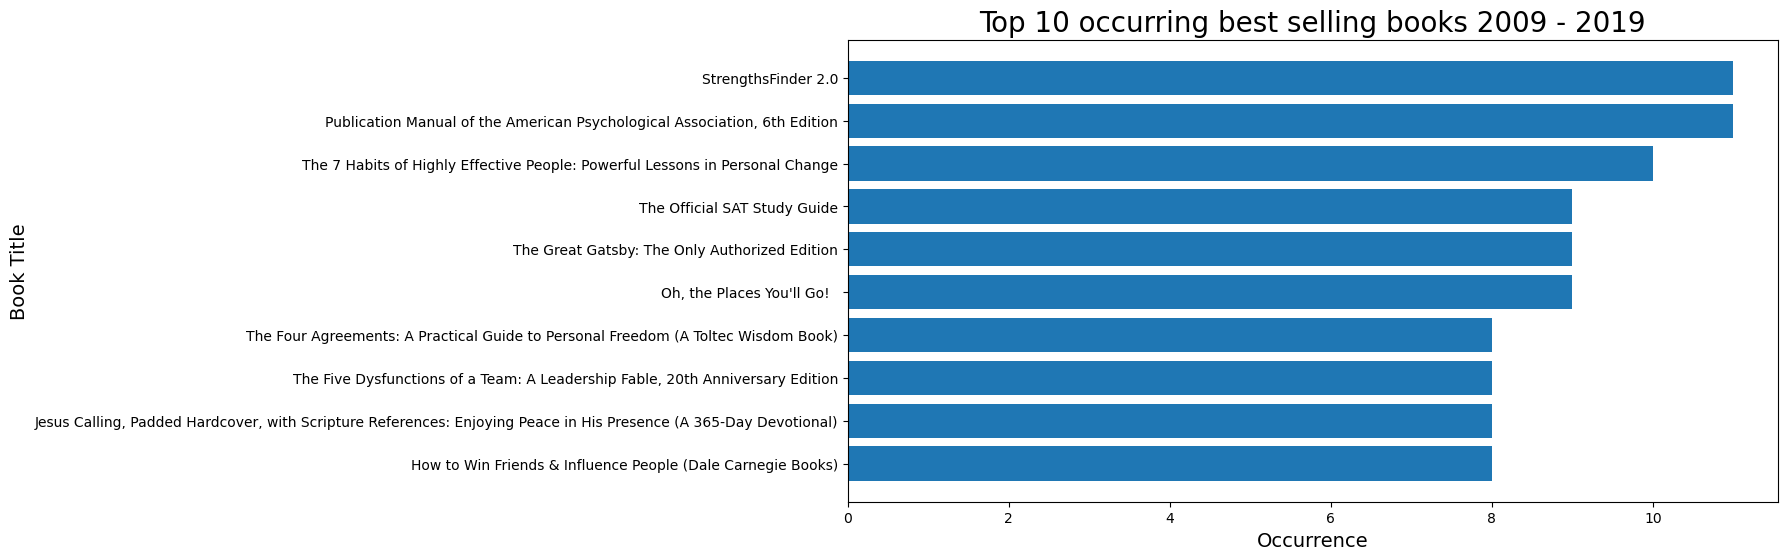

In [39]:
#ploting the books and frequency

Bookfreq1 = Cleaned_Amazon_data.groupby('Title')['Year'].count().nlargest(10).sort_values(ascending = True).reset_index(name = 'num_years')


plt.figure(figsize = [12,6])
plt.barh(Bookfreq1['Title'], Bookfreq1['num_years'])
plt.title('Top 10 occurring best selling books 2009 - 2019', fontsize = 20)
plt.xlabel('Occurrence', fontsize = 14)
plt.ylabel('Book Title', fontsize = 14)
plt.savefig('Bookfrequency', bbox_inches = 'tight', dpi = 300)

Q6). What type of cover did the best selling books have?

In [40]:
#getting the count of the covertypes

Cleaned_Amazon_data['Cover_type'].nunique()

8

There are 8 different types of book covers that the best selling books came in

In [41]:
#getting the various cover types

Cover_count = Cleaned_Amazon_data.groupby('Cover_type')['Year'].count().sort_values(ascending = False).reset_index(name = 'cover_count')
Cover_count

,Cover_type,cover_count
0,Hardcover,552
1,Paperback,444
2,Board book,62
3,Mass Market Paperback,27
4,Cards,1
5,Pamphlet,1
6,Printed Access Code,1
7,Spiral-bound,1


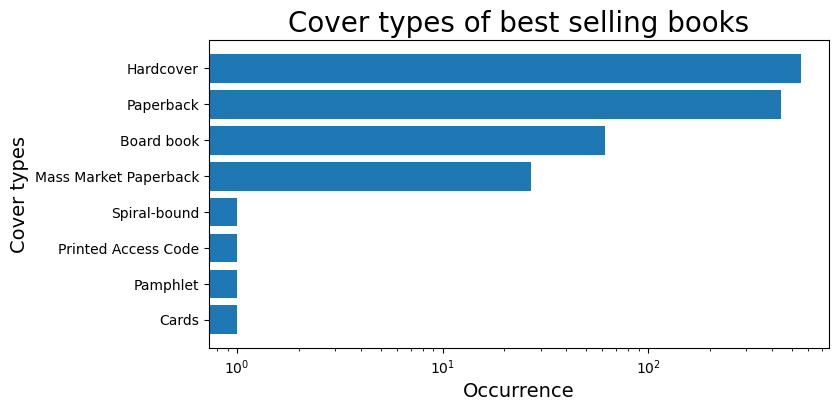

In [42]:
#plotting the frequency of covertypes

Cover_count1 = Cleaned_Amazon_data.groupby('Cover_type')['Year'].count().sort_values(ascending = True).reset_index(name = 'cover_count')

plt.figure(figsize = [8,4])
plt.xscale('log')
plt.barh(Cover_count1['Cover_type'], Cover_count1['cover_count'])
plt.title('Cover types of best selling books', fontsize = 20)
plt.xlabel('Occurrence', fontsize = 14)
plt.ylabel('Cover types', fontsize = 14)
plt.savefig('Covertypefreq', bbox_inches = 'tight', dpi = 300)

From the chart, we can deduce that the Hardcover type of book cover was the most sold

Q7). Did the Year progression affect the Average rating of best selling books?

In [44]:
AvgRaty = Cleaned_Amazon_data.groupby('Year')['Ratings'].mean().reset_index(name= 'Avg_rating')
AvgRaty

,Year,Avg_rating
0,2009-01-01,4.539175
1,2010-01-01,4.547475
2,2011-01-01,4.544444
3,2012-01-01,4.561616
4,2013-01-01,4.566000
5,2014-01-01,4.613000
6,2015-01-01,4.628000
7,2016-01-01,4.669072
8,2017-01-01,4.647475
9,2018-01-01,4.652000


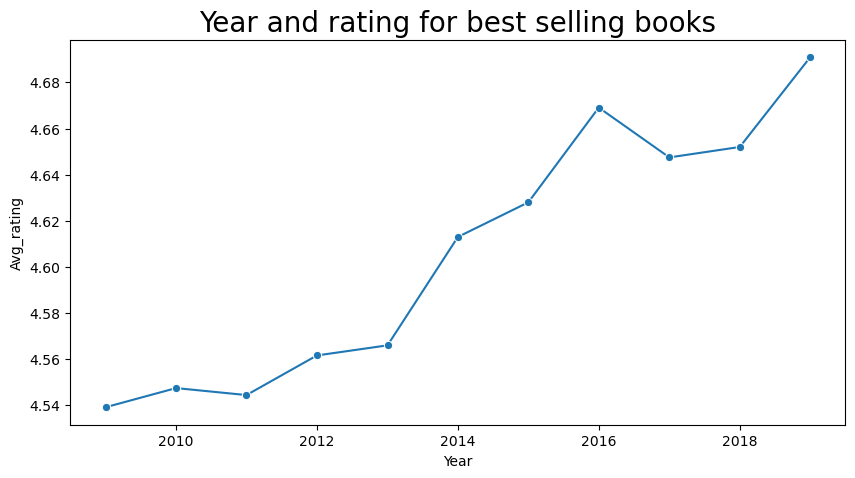

In [45]:
#plotting the year and rating trend

plt.figure(figsize = [10,5])
sns.lineplot(data = AvgRaty, x = 'Year', y = 'Avg_rating', marker = 'o')
plt.title('Year and rating for best selling books', fontsize = 20)
plt.savefig('YearRating', bbox_inches = 'tight', dpi = 300)


From the chart, it seems as if the ratings on average is rising as year increases. This might mean that the class and knowledge of the readers is also becoming better.

Q8). Authors with most books

In [46]:
Authbook = Cleaned_Amazon_data.groupby('Author')['Title'].count().sort_values(ascending = False).reset_index(name = 'books')
Authbook

,Author,books
0,Rick Riordan,18
1,Suzanne Collins,16
2,Jeff Kinney,15
3,John Grisham,13
4,Gallup,13
5,Malcolm Gladwell,12
6,Gary Chapman,11
7,American Psychological Association,11
8,The College Board,11
9,Rob Elliott,10


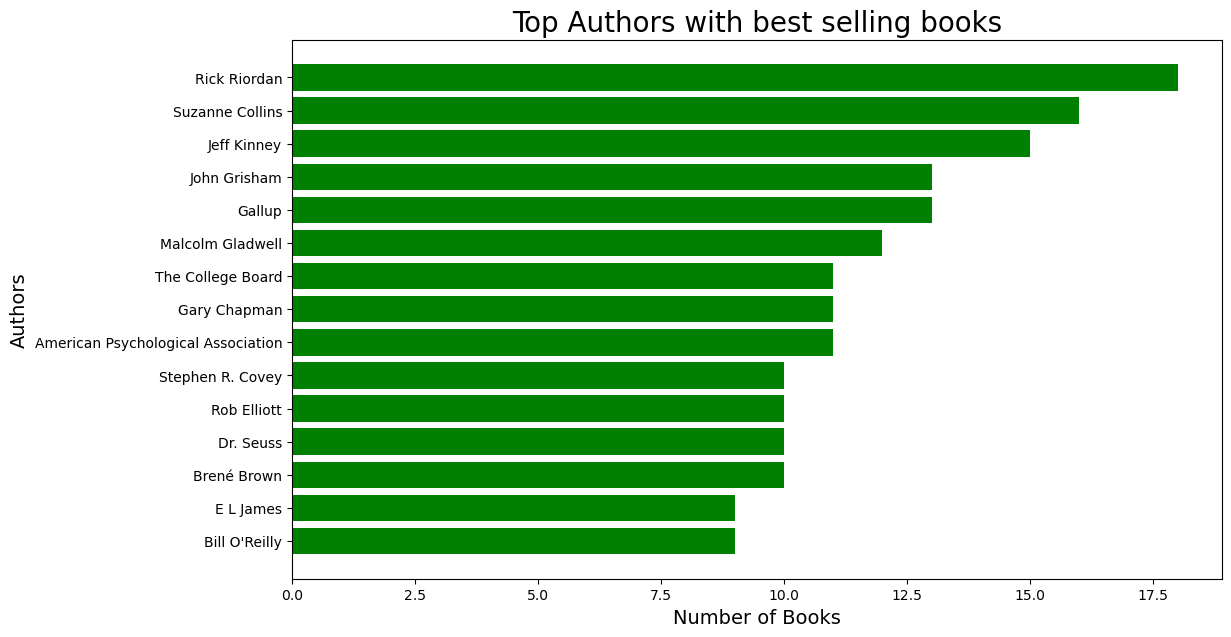

In [47]:
#plotting top 15 authors with best selling books

Authbook1 = Cleaned_Amazon_data.groupby('Author')['Title'].count().nlargest(15).sort_values(ascending = True).reset_index(name = 'books')

plt.figure(figsize = [12,7])
plt.barh(Authbook1['Author'], Authbook1['books'], color = 'g')
plt.title('Top Authors with best selling books', fontsize = 20)
plt.xlabel('Number of Books', fontsize = 14)
plt.ylabel('Authors', fontsize = 14)
plt.savefig('Authorbook', bbox_inches = 'tight', dpi = 300)

Rick Riordan and Suzanne Collins happen to be the authors with the most number of books featured in the best selling books during the 11 year period

Q9). Authors with most Reviews

In [50]:
#getting the review scores of authors

Authrev = Cleaned_Amazon_data.groupby('Author')['Reviews'].mean().sort_values(ascending = False).reset_index(name= 'review')
Authrev

,Author,review
0,Delia Owens,612235.000000
1,Paula Hawkins,492067.000000
2,Alex Michaelides,266142.000000
3,Kristin Hannah,235119.000000
4,Gail Honeyman,226466.000000
5,Mark Sullivan,221948.000000
6,Anthony Doerr,215225.000000
7,Tara Westover,208421.000000
8,Michelle Obama,195559.000000
9,Fredrik Backman,186142.000000


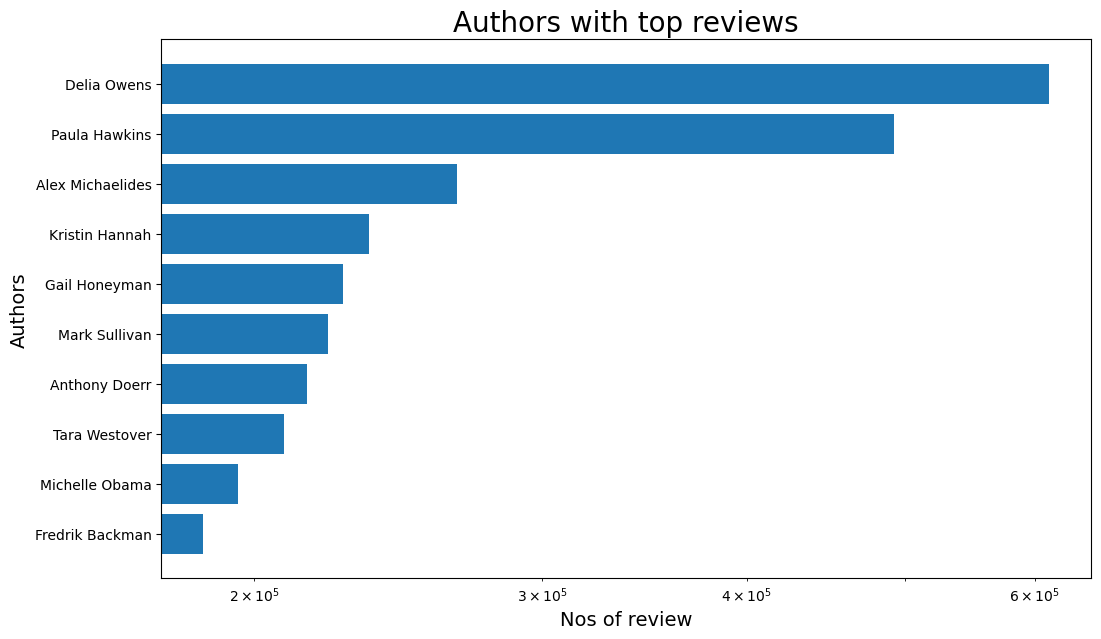

In [51]:
#plotting the authors with top reviews

Authrev1 = Cleaned_Amazon_data.groupby('Author')['Reviews'].mean().nlargest(10).sort_values(ascending = True).reset_index(name= 'review')

plt.figure(figsize = [12,7])
plt.xscale('log')
plt.barh(Authrev1['Author'], Authrev1['review'])
plt.title('Authors with top reviews', fontsize = 20)
plt.xlabel('Nos of review', fontsize = 14)
plt.ylabel('Authors', fontsize = 14)
plt.savefig('AuthorReview', bbox_inches = 'tight', dpi = 300)

Delia Owen happens to be the author that her works were reviewed the most followed by Paula Hawkins 

Q10). Books and Reviews

In [52]:
#getting the reviews of books

bookrev = Cleaned_Amazon_data.groupby('Title')['Reviews'].mean().nlargest(100).sort_values(ascending = False).reset_index(name = 'reviews')
bookrev

,Title,reviews
0,Where the Crawdads Sing,612235.000000
1,The Girl on the Train,492067.000000
2,The Nightingale: A Novel,284317.000000
3,The Silent Patient,266142.000000
4,Eleanor Oliphant Is Completely Fine: A Novel,226466.000000
5,Beneath a Scarlet Sky: A Novel,221948.000000
6,All the Light We Cannot See,215225.000000
7,Educated: A Memoir,208421.000000
8,Becoming,195559.000000
9,A Man Called Ove: A Novel,186142.000000


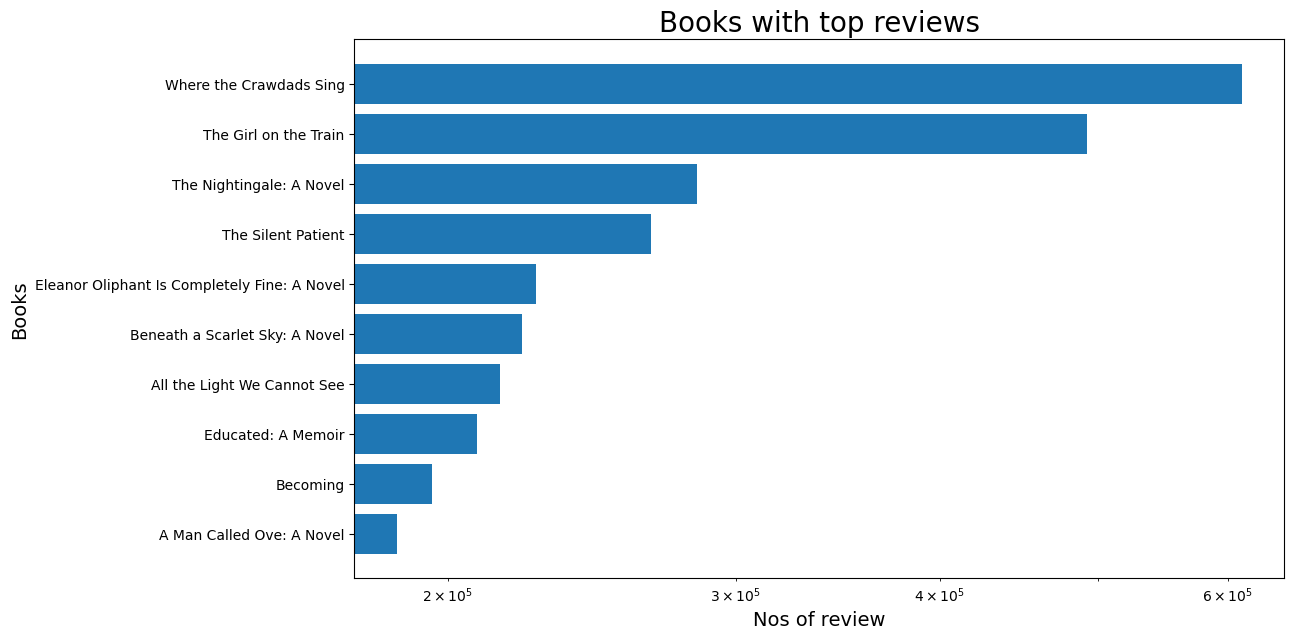

In [53]:
#plotting the top books and reviews

bookrev1 = Cleaned_Amazon_data.groupby('Title')['Reviews'].mean().nlargest(10).sort_values(ascending = True).reset_index(name = 'reviews')

plt.figure(figsize = [12,7])
plt.xscale('log')
plt.barh(bookrev1['Title'], bookrev1['reviews'])
plt.title('Books with top reviews', fontsize = 20)
plt.xlabel('Nos of review', fontsize = 14)
plt.ylabel('Books', fontsize = 14)
plt.savefig('BookReview', bbox_inches = 'tight', dpi = 300)

Where the Crawdads Sing, The Girl on the Train and The Nightingale: A Novel are the top three books that received the most reviews in the time period in question.

Q11). How does Book cover types and Price affect each other

In [54]:

coverprice = Cleaned_Amazon_data.groupby('Cover_type')['Price($)'].mean().sort_values(ascending = False).reset_index(name= 'price')
coverprice

,Cover_type,price
0,Printed Access Code,71.400000
1,Spiral-bound,19.000000
2,Mass Market Paperback,16.887778
3,Hardcover,15.351123
4,Paperback,11.989122
5,Board book,5.108548
6,Cards,4.320000
7,Pamphlet,1.500000


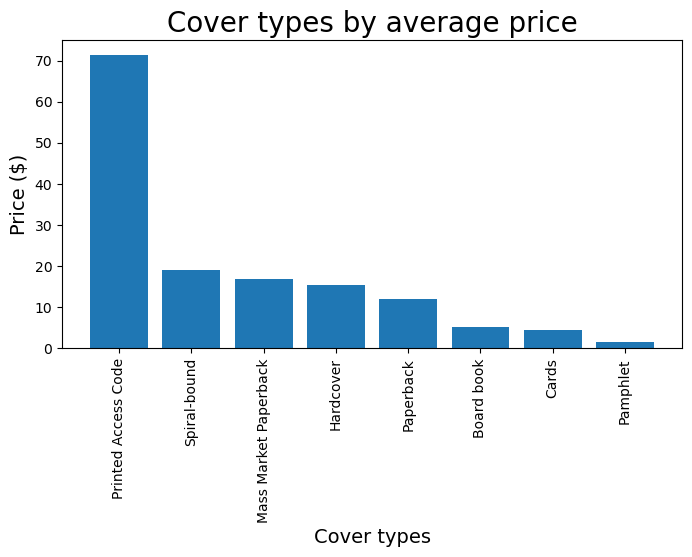

In [55]:
#plotting the cover type and price 

coverprice1 = Cleaned_Amazon_data.groupby('Cover_type')['Price($)'].mean().sort_values(ascending = False).reset_index(name= 'price')

plt.figure(figsize = [8,4])
plt.xticks(rotation= 90)
plt.bar(coverprice1['Cover_type'], coverprice1['price'])
plt.title('Cover types by average price', fontsize = 20)
plt.xlabel('Cover types', fontsize = 14)
plt.ylabel('Price ($)', fontsize = 14)
plt.savefig('CoverPrice', bbox_inches = 'tight', dpi = 300)

It so happens that the Printed Access code is the most costly book cover type and the Pamphlet is the least expensive. The hardcover and paperback are on mean price

Q12). Year and Price trend

In [56]:
yearprice = Cleaned_Amazon_data.groupby('Year')['Price($)'].mean().reset_index(name= 'avg_price')
yearprice

,Year,avg_price
0,2009-01-01,15.938660
1,2010-01-01,15.078384
2,2011-01-01,14.880808
3,2012-01-01,14.931616
4,2013-01-01,14.957600
5,2014-01-01,14.237000
6,2015-01-01,11.662700
7,2016-01-01,11.212990
8,2017-01-01,11.826061
9,2018-01-01,12.179200


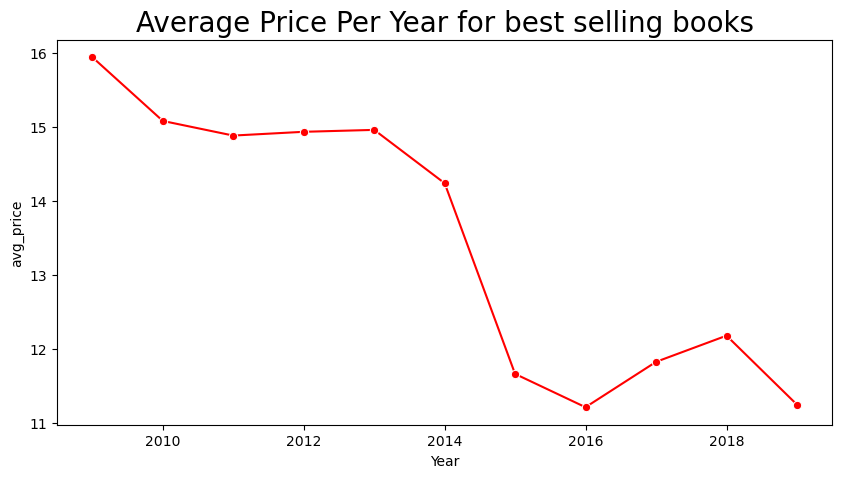

In [57]:
#plotting the year and price trend

plt.figure(figsize = [10,5])
sns.lineplot(data = yearprice, x = 'Year', y = 'avg_price', marker = 'o', color ='r')
plt.title('Average Price Per Year for best selling books', fontsize = 20)
plt.savefig('YearPrice', bbox_inches = 'tight', dpi = 300)

It seems as if the price of books are on the decrease as the year went by. This might be because of new innovations in printing technology such as introduction of various cover types and other factors.

## 3.0 OBSERVATIONS